#### Example

This is an example of the complete process used to generate and plot the data for the paper 'Compare the Pair: Rotated vs. Unrotated Surface Codes at Equal Logical Error Rates'. 

##### Requirements

In [33]:
# pip install stim      # Stim: a stabiliser circuit simulator

In [34]:
# pip uninstall sinter -y

In [35]:
# pip install sinter==1.13.0 

In [36]:
import sinter
import stim
import numpy as np

import os
import sys

import shutil
import subprocess

sys.path.insert(0, 'functions') 
import oscAntgencircuitv2 as oscant
import morefuncs as morefuncs
import com_funcs5 as funcs

# Update with any changes to these files:
from importlib import reload
reload(morefuncs)
reload(funcs)
reload(oscant);

##### Generate surface code circuits -- choose SD or SI noise

In [57]:
# Inputs:

noise_model = 'SI' # choose SD (standard depolarising) or SI (superconducting inspired) noise
p_values = [0.003,0.004] 
ds = [2]


# (optional: choose CNOT order):
# CNOT orders for x-type and z-type stabiliser measurements        
x = (1,0,2,3) # x hook error in rotated code if last two x-type CNOT's are 12, 21, 03 or 30
z = (1,2,0,3) # z hook error in rotated code if last two z-type CNOT's are 01, 10, 23 or 32 
# x = (...) and z = (...) above define the CNOT order for x and z type stabilisers. E.g. order 10231203 avoids hook errors in the rotated code and is a worst-case CNOT order for the unrotated code if doing memory Z experiments (worst-case taken to be most applicable to all states). 
unro_CNOT_order = int(''.join(map(str, x + z)))
ro_CNOT_order = unro_CNOT_order



# Generate circuits:
reload(morefuncs)
reload(funcs)

directory = "circuits/supplementary_circuits/example_circuits"

# Delete existing example circuits so as not to sample them.
funcs.remove_files_within_directories(directory)


for ro in ['unro','ro']:  
    for d in ds:
        for p in p_values:
            for b in 'xz':
                thecircuit = oscant.generate_circuit(
                    f"surface_code:{ro}tated_memory_{b}",
                    rounds=3*d, 
                    distance=d, 
                    after_clifford_depolarization=p,
                    after_reset_flip_probability=p,
                    before_measure_flip_probability=p, 
                    # before_round_data_depolarization=p, # this is removed as we will be adding idling errors anyway which do the same thing
                    x_cnot_order = x,
                    z_cnot_order = z,
                    exclude_other_basis_detectors = True, # no need to add their detections to the graph which will be given to PyMatching as it is not a correlated decoder (circuit still performs the opposite basis' stabiliser measurements though, just doesn't include their results in the detector matching graph)
                )

                morefuncs.add_idling_errors_and_save_circuit(thecircuit, b, d, p, ro, x, z,directory) # saves circuit in circuits/SD (standard depolarising)
                # # Generate SI (SI with CX gates) p_values model circuits too by adjusting error probabilities of SD circuits then saving a separate circuit:
                if noise_model == 'SI':
                    thecircuit = morefuncs.make_SI_circuit(b, d, p, ro, x, z, directory)
if noise_model == 'SI':
    funcs.remove_files_within_directories(f"{directory}/SD")

##### Optional: visualise a circuit

Visualise one of the circuits generated above (includes idling errors):

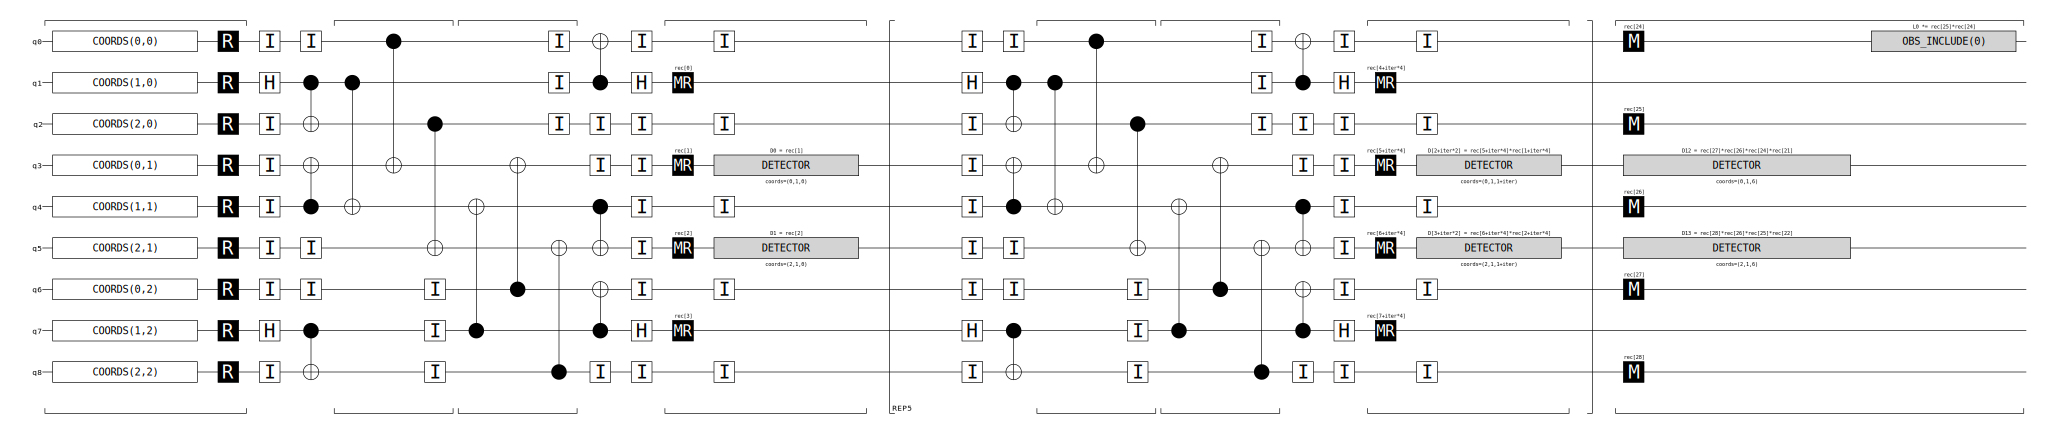

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":200,"max":[16,3,27.4868335723877],"min":[-10,3,-9.4868335723877],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":120,"max":[16,3,27.4868335723877],"min":[-10,3,-9.4868335723877],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":2400,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":4,"byteLength":1440,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":2400,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AAAAAAAAQEAAAAAAwmJKwAAAQEASyhfBAAAAAAAAQEAAAAAAAADAQAAAQEAAAAAAAAAAAAAAQEAAAAAAAAAAAAAAQEAAAEBAAADAQAAAQEAAAAAAsJgSQQAAQEASyhfBAADAQAAAQEAAAAAAAAAAAAAAQEAAAEBAAADAQAAAQEAAAAAAAADAQAAAQEAAAEBAAAAAAAAAQEAAAEBAvRuPwAAAQEB6N77AAAAAAAAAQEAAAEBAAADAQAAAQEAAAEBAAAAAAAAAQEAAAEBAAAAAAAAAQEAAAMBAAAAAAAAAQEAAAEBAvRuPwAAAQEB6N77AAAAAAAAAQEAAAAAAwmJKwAAAQEASyhfBAAAAAAAAQEAAAEBAvRuPwAAAQEB6N77AAADAQAAAQEAAAAAAsJgSQQAAQEASyhfBAADAQAAAQEAAAEBA3o0nQQAAQEB6N77AAADAQAAAQEAAAEBAAADAQAAAQEAAAMBAAADAQAAAQEAAAEBA3o0nQQAAQEB6N77AAADAQAAAQEAAAAAAsJgSQQAAQEASyhfBAAAAAAAAQEAAAEBAvRuPwAAAQEB6N77AAAAAAAAAQEAAAEBAAADAQAAAQEAAAEBAAAAAAAAAQEAAAEBAAAAAAAAAQEAAAMBAAADAQAAAQEAAAEBA3o0nQQAAQEB6N77AAADAQAAAQEAAAEBAAAAAAAAAQEAAAMBAAADAQAAAQEAAAEBAAADAQAAAQEAAAMBAAAAAAAAAQEAAAMBAMUbiwAAAQEDEGIm/AAAAAAAAQEAAAMBAAADAQAAAQEAAAMBAAAAAAAAAQEAAAMBAAAAAAAAAQEAAABBBAAAAAAAAQEAAAMBAMUbiwAAAQEDEGIm/AAAAAAAAQEAAAEBAvRuPwAAAQEB6N77AAAAAAAAAQEAAAMBAMUbiwAAAQEDEGIm/AADAQAAAQEAAAEBA3o0nQQAAQEB6N77AAADAQAAAQEAAAMBAGCNRQQAAQEDEGIm/AADAQAAAQEAAAMBAAADAQAAAQEAAABBBAADAQAAAQEAAAMBAGCNRQQAAQEDEGIm/AADAQAAAQEAAAEBA3o0nQQAAQEB6N77AAAAAAAAAQEAAAMBAMUbiwAAAQEDEGIm/AAAAAAAAQEAAAMBAAADAQAAAQEAAAMBAAAAAAAAAQEAAAMBAAAAAAAAAQEAAABBBAADAQAAAQEAAAMBAGCNRQQAAQEDEGIm/AADAQAAAQEAAAMBAAAAAAAAAQEAAABBBAADAQAAAQEAAAMBAAADAQAAAQEAAABBBAAAAAAAAQEAAABBBAAAgwQAAQEAAABBBAAAAAAAAQEAAABBBAADAQAAAQEAAABBBAAAAAAAAQEAAABBBAAAAAAAAQEAAAEBBAAAAAAAAQEAAABBBAAAgwQAAQEAAABBBAAAAAAAAQEAAAMBAMUbiwAAAQEDEGIm/AAAAAAAAQEAAABBBAAAgwQAAQEAAABBBAADAQAAAQEAAAMBAGCNRQQAAQEDEGIm/AADAQAAAQEAAABBBAACAQQAAQEAAABBBAADAQAAAQEAAABBBAADAQAAAQEAAAEBBAADAQAAAQEAAABBBAACAQQAAQEAAABBBAADAQAAAQEAAAMBAGCNRQQAAQEDEGIm/AAAAAAAAQEAAABBBAAAgwQAAQEAAABBBAAAAAAAAQEAAABBBAADAQAAAQEAAABBBAAAAAAAAQEAAABBBAAAAAAAAQEAAAEBBAADAQAAAQEAAABBBAACAQQAAQEAAABBBAADAQAAAQEAAABBBAAAAAAAAQEAAAEBBAADAQAAAQEAAA

In [58]:
noise_model = 'SI'
d = ds[0] # distance 
p = p_values[0] # physical error rate
basis = 'z' # choices are x (preserve logical plus state) or z (preserve logical zero state)
rot = 'unro' # choices are 'ro' or 'unro' for rotated or unrotated surface code
order = unro_CNOT_order # CNOT order as an integer.

circuit_path = f"{directory}/{noise_model}/{basis}/d={d},p={p},noise={noise_model},b={basis},r=3d,ro={rot},o={order},idl=y.stim"
thecircuit = stim.Circuit.from_file(circuit_path) 

# print(repr(thecircuit))
# display(thecircuit.diagram('timeline-svg'))
display(thecircuit.without_noise().diagram('timeline-svg'))
# display(thecircuit.diagram("matchgraph-3d") ) # the matching graph given to pymatching. 

# display(thecircuit.without_noise().diagram("detslice-with-ops-svg", tick=range(0,4))) # note only one stab. type detecting region appears if exlude_other_basis_detectors above is True, though the operations will still be done to measure that stabiliser
# display(thecircuit.without_noise().diagram("detslice-svg", tick=range(0,4)))
# display(thecircuit.diagram('timeline-svg', tick = range(0,4)))

Visualise a new circuit (without idling errors):

In [ ]:
import stim
d = 2
p = 0.001
ro = 'unro'

## Generate a surface code circuit:
circuit = stim.Circuit.generated(
    f"surface_code:{ro}tated_memory_z",
    rounds=3*d, # getting started notebook is d*3
    distance=d, # getting started notebook is d = 3
    # after_clifford_depolarization=p,
    # after_reset_flip_probability=p,
    # before_measure_flip_probability=p, # (simulates a faulty measurement)
    before_round_data_depolarization=p,
)

## Display circuit:
print(repr(circuit))
# circuit.without_noise().diagram("timeslice-svg",tick = range(0,16))
# circuit.diagram("detslice-svg", tick=range(0,10))
# circuit.diagram("detslice-svg",tick = range(9,10))
# circuit.without_noise().diagram("detslice-with-ops-svg", tick=range(0,8))

# circuit.without_noise().diagram("timeline-3d") #3d circuit diagram
# circuit.diagram("timeline-3d")
# circuit.without_noise().diagram("timeline-svg")

# display(circuit.without_noise().diagram("timeline-svg"))
display(circuit.diagram("timeline-svg"))
circuit.diagram('matchgraph-3d')

##### Sample the circuits:

In [39]:
%%bash

rm collected_stats/example_stats.csv 2>/dev/null

sinter collect \
    --processes 4 \
    --circuits circuits/supplementary_circuits/example_circuits/*/*/*.stim \
    --metadata_func "sinter.comma_separated_key_values(path)" \
    --decoders pymatching \
    --max_shots 10_000 \
    --max_errors 10_000 \
    --save_resume_filepath collected_stats/example_stats.csv

Starting 4 workers...
8 cases left:
    pymatching processes=1  ~core_mins_left=None    (initializing...) {b=x,d=3,idl=y,noise=SI,o=10231203,p=0.003,r=3d,ro=ro}
    pymatching processes=1  ~core_mins_left=None    (initializing...) {b=x,d=3,idl=y,noise=SI,o=10231203,p=0.003,r=3d,ro=unro}
    pymatching processes=1  ~core_mins_left=None    (initializing...) {b=x,d=3,idl=y,noise=SI,o=10231203,p=0.004,r=3d,ro=ro}
    pymatching processes=1  ~core_mins_left=None    (initializing...) {b=x,d=3,idl=y,noise=SI,o=10231203,p=0.004,r=3d,ro=unro}
8 cases left:
    pymatching processes=1  ~core_mins_left=None    shots_left=10000    errors_left=10000   {b=x,d=3,idl=y,noise=SI,o=10231203,p=0.003,r=3d,ro=ro}
    pymatching processes=1  ~core_mins_left=None    shots_left=10000    errors_left=10000   {b=x,d=3,idl=y,noise=SI,o=10231203,p=0.003,r=3d,ro=unro}
    pymatching processes=1  ~core_mins_left=None    shots_left=10000    errors_left=10000   {b=x,d=3,idl=y,noise=SI,o=10231203,p=0.004,r=3d,ro=ro}
   

In [40]:
# # # (optional) combine and print the stats,:
# mylist = sinter.stats_from_csv_files(f'collected_stats/example_stats.csv')
# for el in mylist: 
    # print(el)

##### Threshold plots: $p_L$ vs. $p$

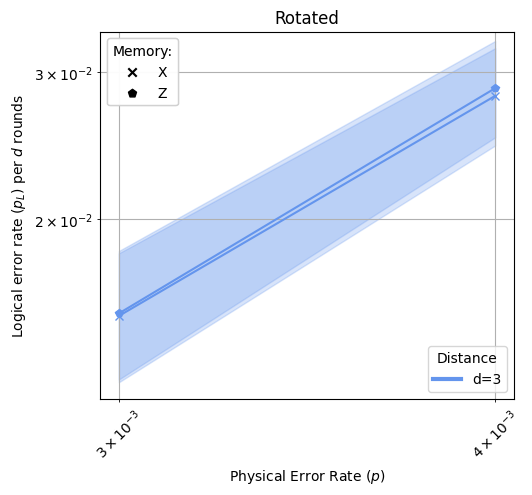

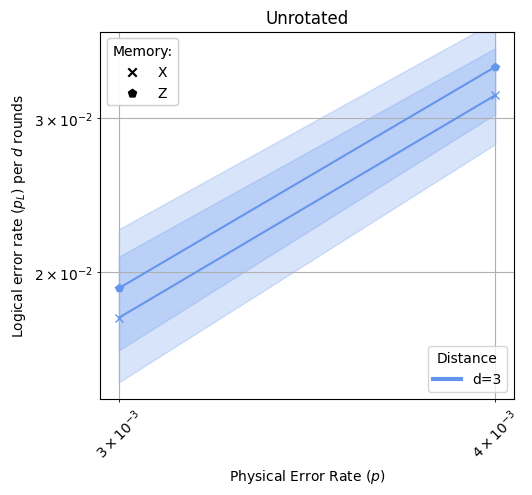

In [41]:
reload(funcs)
mylist = sinter.stats_from_csv_files(f'collected_stats/example_stats.csv')
funcs.plot_thresholds(mylist, ro_CNOT_order, unro_CNOT_order) # expects data for both rotated and unrotated code

##### Fit to scaling function $p_L = \alpha ( p / \beta)^{\gamma d - \delta}$

In [42]:
reload(funcs)
distances = 'combined' # choices are 'odd', 'even' or 'combined'
b = 'z' # choices are x or z 
noise_model = 'SD' # choices are SD or SI

funcs.fit_scaling_and_plot(mylist, distances, b, ro_CNOT_order, unro_CNOT_order, minp = min(p_values), maxp = max(p_values)) 

Need at least two combined distances to perform fit. Skipping this function.


##### Plot as $p_L$ vs. $\sqrt{n}$

C:\Users\24510265\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\24510265\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\24510265\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


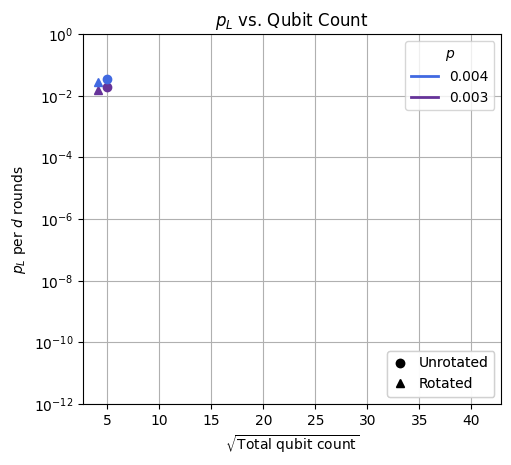

In [43]:
reload(funcs)

b = 'z' 

mylist = sinter.stats_from_csv_files(f'collected_stats/example_stats.csv')
# 
funcs.plot_pL_vs_qubit_count(mylist, b, ro_CNOT_order, unro_CNOT_order)

##### Plot 'teraquop' count :$\ $ the number of qubits required to reach $p_L = 10^{-12}$

In [44]:
reload(funcs)
funcs.plot_teraquop(mylist, b, ro_CNOT_order, unro_CNOT_order, optional_plot = False)

<IPython.core.display.Math object>

TypeError: Improper input: func input vector length N=2 must not exceed func output vector length M=1

##### Plot ratios of qubit counts vs. $p_L$

This is the projected number of qubits used by the rotated surface code divided by the number of qubits used by the unrotated surface code to achieve the same $p_L$

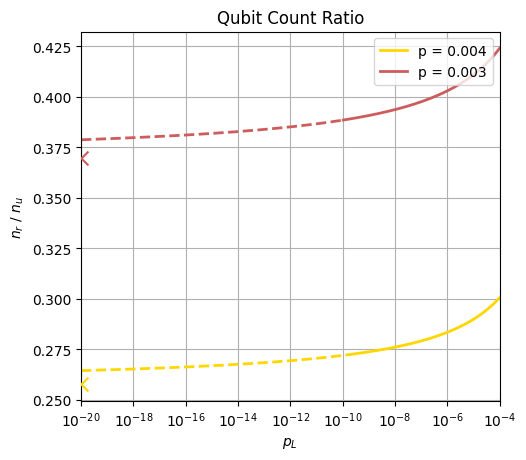

In [ ]:
reload(funcs)

funcs.plot_ratio(mylist, b, ro_CNOT_order, unro_CNOT_order)

##### Memory time vs. $\sqrt{n}$

This is a reformulation of the $p_L$ vs. $\sqrt{n}$ plots above, converting the $p_L$ per $d$ rounds to be the length of time (assuming one stabiliser measurement cycle take a microsecond) before $p_L$ over the entire shot of the memory experiment equals $p$.

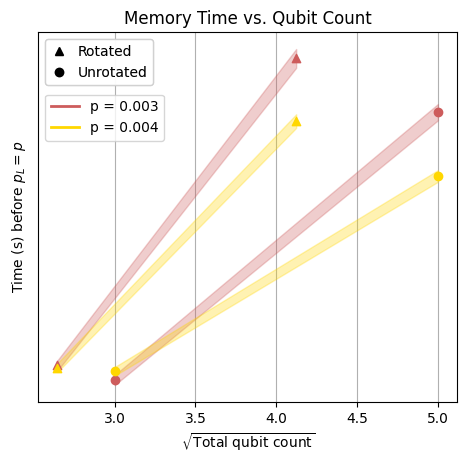

In [ ]:
funcs.plot_memory_times(mylist, b, ro_CNOT_order, unro_CNOT_order)